# Mars Weather Data Analysis

#### Import libraries

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from math import sqrt

import statsmodels.api as sms

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans


#### Load dataset

In [385]:
rawData = pd.read_csv('mars-weather.csv')

In [386]:
rawData.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [387]:
rawData.shape

(1894, 10)

### Data exploration


In [388]:
updatedData = rawData.drop(['id','wind_speed','atmo_opacity', 'terrestrial_date'], axis=1)

updatedData

,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,Month 5,-77.0,-10.0,727.0
1,1976,135,Month 5,-77.0,-10.0,728.0
2,1975,134,Month 5,-76.0,-16.0,729.0
3,1974,134,Month 5,-77.0,-13.0,729.0
4,1973,133,Month 5,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1889,12,156,Month 6,-76.0,-18.0,741.0
1890,11,156,Month 6,-76.0,-11.0,740.0
1891,10,155,Month 6,-75.0,-16.0,739.0
1892,9,155,Month 6,NaN,NaN,NaN


In [389]:
updatedData.describe()

,sol,ls,min_temp,max_temp,pressure
count,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000
mean,1007.930306,169.180570,-76.121050,-12.510445,841.066417
std,567.879561,105.738532,5.504098,10.699454,54.253226
min,1.000000,0.000000,-90.000000,-35.000000,727.000000
25%,532.250000,78.000000,-80.000000,-23.000000,800.000000
50%,1016.500000,160.000000,-76.000000,-11.000000,853.000000
75%,1501.750000,259.000000,-72.000000,-3.000000,883.000000
max,1977.000000,359.000000,-62.000000,11.000000,925.000000


In [390]:
# Removing the nan values
data = updatedData.dropna()

In [391]:
data.describe()

,sol,ls,min_temp,max_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,1015.670059,168.865024,-76.121050,-12.510445,841.066417
std,565.342298,105.599153,5.504098,10.699454,54.253226
min,10.000000,0.000000,-90.000000,-35.000000,727.000000
25%,546.500000,78.000000,-80.000000,-23.000000,800.000000
50%,1028.000000,160.000000,-76.000000,-11.000000,853.000000
75%,1505.500000,257.500000,-72.000000,-3.000000,883.000000
max,1977.000000,359.000000,-62.000000,11.000000,925.000000


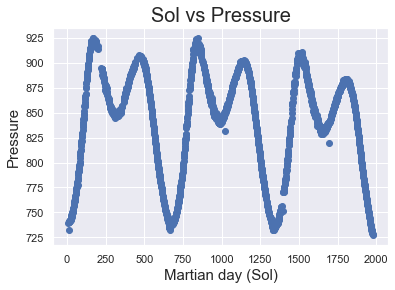

In [392]:
plt.scatter(data['sol'], data['pressure'])
plt.xlabel("Martian day (Sol)", fontsize=15)
plt.ylabel("Pressure", fontsize=15)
plt.title('Sol vs Pressure', fontsize = 20)
plt.show()

### X and Y


In [393]:
data['month'] = data['month'].map({
    'Month 1':1,
    'Month 2':2,
    'Month 3':3,
    'Month 4':4,
    'Month 5':5,
    'Month 6':6,
    'Month 7':7,
    'Month 8':8,
    'Month 9':9,
    'Month 10':10,
    'Month 11':11,
    'Month 12':12,

})

data

C:\Users\ACER\AppData\Local\Temp\ipykernel_16104\2569857848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['month'].map({


,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,5,-77.0,-10.0,727.0
1,1976,135,5,-77.0,-10.0,728.0
2,1975,134,5,-76.0,-16.0,729.0
3,1974,134,5,-77.0,-13.0,729.0
4,1973,133,5,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1887,14,157,6,-74.0,-16.0,740.0
1888,13,157,6,-74.0,-15.0,732.0
1889,12,156,6,-76.0,-18.0,741.0
1890,11,156,6,-76.0,-11.0,740.0


In [394]:
data['month'].unique()

array([ 5,  4,  3,  2,  1, 12, 11, 10,  9,  8,  7,  6], dtype=int64)

In [395]:
data.describe()

,sol,ls,month,min_temp,max_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,1015.670059,168.865024,6.141939,-76.121050,-12.510445,841.066417
std,565.342298,105.599153,3.506493,5.504098,10.699454,54.253226
min,10.000000,0.000000,1.000000,-90.000000,-35.000000,727.000000
25%,546.500000,78.000000,3.000000,-80.000000,-23.000000,800.000000
50%,1028.000000,160.000000,6.000000,-76.000000,-11.000000,853.000000
75%,1505.500000,257.500000,9.000000,-72.000000,-3.000000,883.000000
max,1977.000000,359.000000,12.000000,-62.000000,11.000000,925.000000


In [396]:
# After training it looks like MONTH is not giving good result so
data = data.drop(['month'], axis = 1)


### Regression with Statsmodel

In [397]:
X = data.drop(['pressure'], axis=1)
Y = data['pressure']

In [398]:
x = sms.add_constant(X)

statModel = sms.OLS(Y,X).fit()

statModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               pressure   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          6.368e+04
Date:                Sun, 21 May 2023   Prob (F-statistic):                        0.00
Time:                        00:01:51   Log-Likelihood:                         -10629.
No. Observations:                1867   AIC:                                  2.127e+04
Df Residuals:                    1863   BIC:                                  2.129e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sol         9.632e-05      0.003      0.032      0.975      -0.006       0.006
ls             0.2128      0.021     10.053      0.000       0.171       0.254
min_temp     -11.0334      0.090   -123.254      0.000     -11.209     -10.858
max_temp       2.9518      0.244     12.107      0.000       2.474       3.430
==============================================================================
Omnibus:                      206.205   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.117
Skew:                          -0.075   Prob(JB):                     1.46e-13
Kurtosis:                       2.141   Cond. No.                         179.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Visualization II

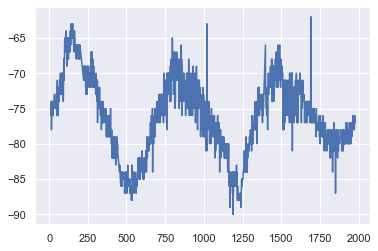

In [399]:
plt.plot(data['sol'],data['min_temp'])

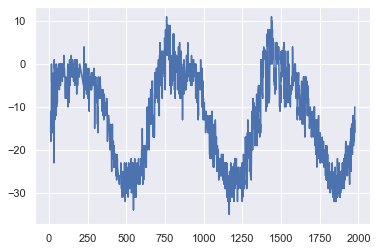

In [400]:
plt.plot(data['sol'],data['max_temp'])

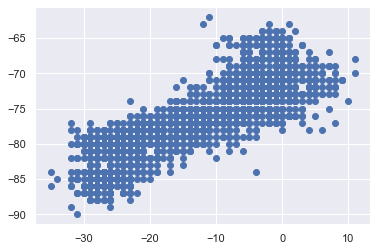

In [401]:
plt.scatter(data['max_temp'], data['min_temp'])
plt.show()

#### Linear Regression

In [402]:
# splitting the dataset

xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1493, 4)
(1493,)
(374, 4)
(374,)


In [403]:
model1 = LinearRegression()

model1.fit(xtrain, ytrain)



LinearRegression()

In [404]:
model1.intercept_


1175.0272829753408

In [405]:
model1.coef_

array([-0.01100661,  0.03014649,  4.68190286, -2.35018552])

In [406]:

ypred = model1.predict(xtest)

In [407]:

mse = mean_squared_error(ytest, ypred)


rmse = sqrt(mse)
r2 = r2_score(ytest, ypred)


print(f"R2 score is : {round(r2,3)}")
print(f"Accuracy score is : {round(rmse,2)} %")

R2 score is : 0.065
Accuracy score is : 52.14 %


###### The accuracy of the model is not that good, so we can make out that the we don't have enough features and data to improve the model's accuracy for regression

### Clustering

In [408]:
# Lets see which cluster value is best using elbow method

wcss = []

for cluster in range(1,9):
    
    kmeans = KMeans(cluster)
    
    kmeans.fit(data)
    
    WCSS = kmeans.inertia_
    
    wcss.append(WCSS)
    
wcss
    

e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

[622966489.6957687,
 176794371.224244,
 94878181.68189058,
 61406317.8095244,
 43586510.62127007,
 27514415.265146717,
 21927051.91912327,
 16414302.011293408]

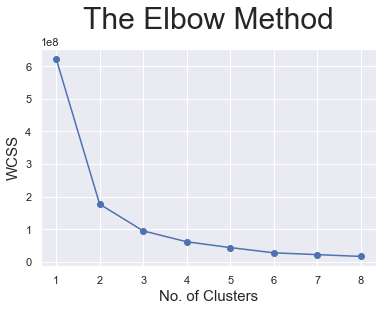

In [409]:
# Plotting the elbow

yAxis = wcss
xAxis = range(1,9)

plt.scatter(xAxis, yAxis)
plt.plot(xAxis, yAxis)  # To show the line that connect the dots

plt.title("The Elbow Method", fontsize=30, pad=20)
plt.ylabel("WCSS", fontsize=15)
plt.xlabel("No. of Clusters", fontsize=15)

plt.show()

###### Therefore we can see that the ideal value of k can be 2, 3 or 4. therefore we will go with 3

In [410]:
model2 = KMeans(3)

model2.fit(data)



e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [411]:
clusterInfo = model2.fit_predict(data)

clusteredData = data.copy()

clusteredData['cluster'] =clusterInfo

clusteredData.head()

e:\PYTHON\PYTHON\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sol,ls,min_temp,max_temp,pressure,cluster
0,1977,135,-77.0,-10.0,727.0,2
1,1976,135,-77.0,-10.0,728.0,2
2,1975,134,-76.0,-16.0,729.0,2
3,1974,134,-77.0,-13.0,729.0,2
4,1973,133,-78.0,-18.0,730.0,2


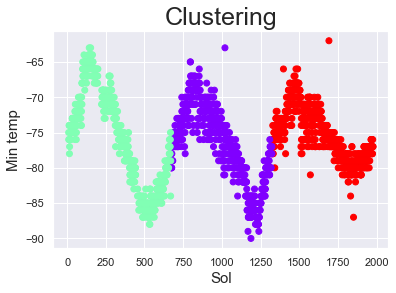

In [412]:
plt.scatter(clusteredData['sol'], clusteredData['min_temp'], c=clusteredData['cluster'] ,cmap='rainbow')
plt.xlabel("Sol", fontsize=15)
plt.ylabel("Min temp", fontsize=15)
plt.title("Clustering", fontsize=25)
plt.show()

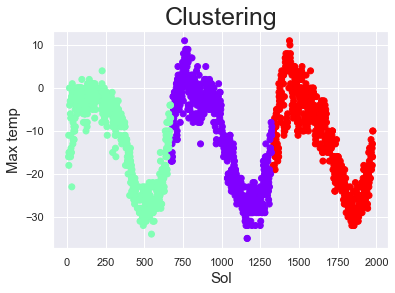

In [413]:
plt.scatter(clusteredData['sol'], clusteredData['max_temp'], c=clusteredData['cluster'] ,cmap='rainbow')
plt.xlabel("Sol", fontsize=15)
plt.ylabel("Max temp", fontsize=15)
plt.title("Clustering", fontsize=25)
plt.show()